# Personal Notebook - Playgrounds!

![Duck Slide](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExOWdjNjJld3M4NHczemFzZXVlMjE4dGU3YTU2cTA1c292M2Yyd3hxeCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Yqqd7rRT5n5qE/giphy.gif)

### First let's import the necessary modules for data manipulation:

In [1]:
#import pandas/geopandas
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

# My DataSet:
My metric for determining Best Neighborhood of Pittsburgh is the total number of playgrounds that reside within the neighborhood.

    - The number of playgrounds within a neighborhood may correlate to said neighborhood's general commitment to the enrichment of its children
    - A playground provides a place for children to gather and socialize, as well as get some exercise

### Now it's time to read in the dataset as a Pandas Series 
(or a "Panda", as I like to call it)

In [2]:
pg = pd.read_csv("Pittsburgh_Playgrounds.csv")

,_id,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,2,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,3,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,4,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,5,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064



#### Let's take a peek at how our dataset is organized:


In [18]:
#Display a few data points 
pg.sample(5)

,_id,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
13,14,966240511,Brighton Heights Playground,NaN,Parks - Northern,Brighton Heights Park,BRIGHTON WOODS RD,https://tools.wprdc.org/images/pittsburgh/play...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.486669,-80.031856
122,123,675610013,McKinley Upper Playground,NaN,NaN,McKinley Park,MICHIGAN ST,NaN,Beltzhoover,4,18,42003562400,5,18,3,4-16,40.415730,-80.002950
43,44,589541836,Frazier Playground,NaN,Parks - Schenley,Frazier Park,FRAZIER ST,https://tools.wprdc.org/images/pittsburgh/play...,South Oakland,3,4,42003040900,3,4,4,2-11,40.429215,-79.953910
50,51,82940829,Heth's Playground,NaN,Parks - Northeast,Heth's Park,HAMPTON ST,https://tools.wprdc.org/images/pittsburgh/play...,Morningside,7,10,42003101400,2,10,5,3-7,40.476888,-79.928178
20,21,130973977,Chartiers Playground,NaN,Parks - Western,Chartiers Park,CHARTIERS AVE,https://tools.wprdc.org/images/pittsburgh/play...,Windgap,2,28,42003563000,5,28,6,1-16,40.457028,-80.075011


#### Now that we've converted the dataset into a "Panda", lets extract and tally up the number of playgrounds within each neighborhood!

In [19]:
#Group the data points by neighborhood, counting the instances of each neighborhood
pg_count = pg.groupby("neighborhood").count()["park"]

and plot...

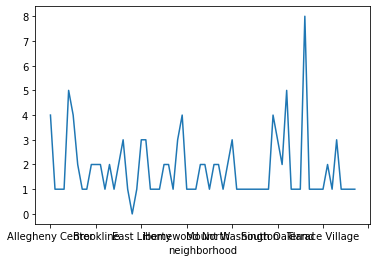

In [20]:
pg_count.plot()

# Huhhhh???

![Confusion](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExa24xOXdhM2RjcWN6ODY2d3BtMTlxZnA2OGQ1azhyeWcxb3FkeW84bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/SYcpSY0lNdPIHhCvjT/giphy.gif)

### Well that's not very helpful...



Much work still needs to be done on our Panda before we can gain any meaningful information from it...

...To find out the "best" neighborhood, we will sort our newly-created series by descending order...

In [12]:
pg_count = pg_count.sort_values(ascending=False)

print(pg_count)

neighborhood
Squirrel Hill South    8
Beechview              5
South Side Slopes      5
Allegheny Center       4
Sheraden               4
                      ..
Oakwood                1
Perry North            1
Perry South            1
Windgap                1
East Allegheny         0
Name: park, Length: 68, dtype: int64


## And the Winner issss.....

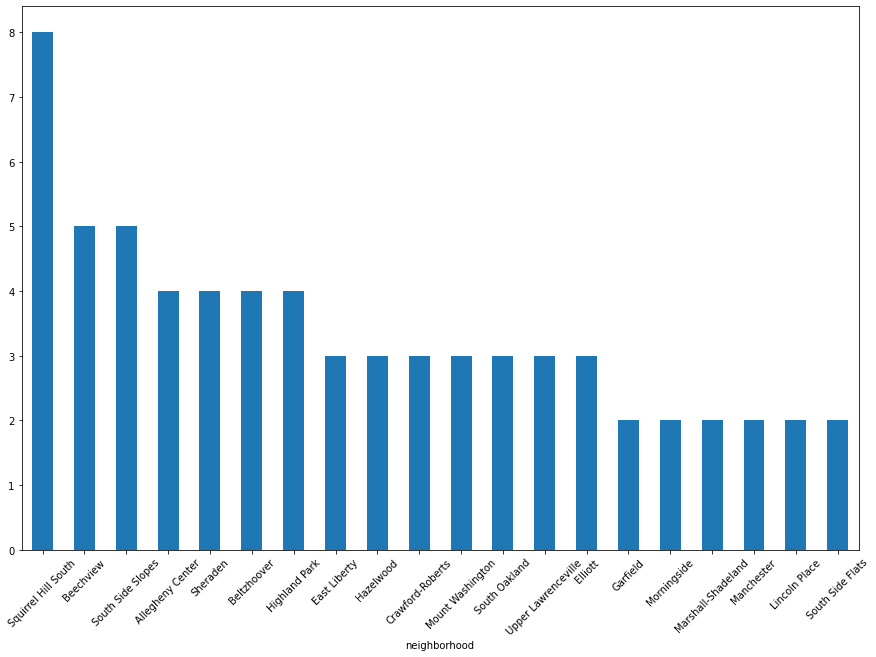

In [15]:
pg_count_20 = pg_count.head(20)
pg_count_20.plot(kind='bar', figsize=(15,10), rot=45)


# Squirrel Hill South!
(With a grand total of 8 playgrounds!)

## Well...Now what?

#### While we could end our analysis of the dataset right here, it might help to have a top-down visualization of this data...

(Let's get a little help from our friend GeoPandas and an additional dataset)

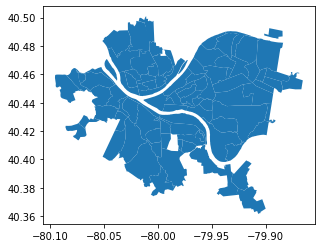

In [5]:
#read in a shape file of the Pittsburgh neighborhoods
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#and plot them out...
neighborhoods.plot() 

#### Now let's merge this neighborhood data with our playground count...

In [6]:
pg_map = neighborhoods.merge(pg_count, how='left', left_on='hood', right_on='neighborhood')

#### ...and plot it! (with some added code sprinkled in to make it pop)

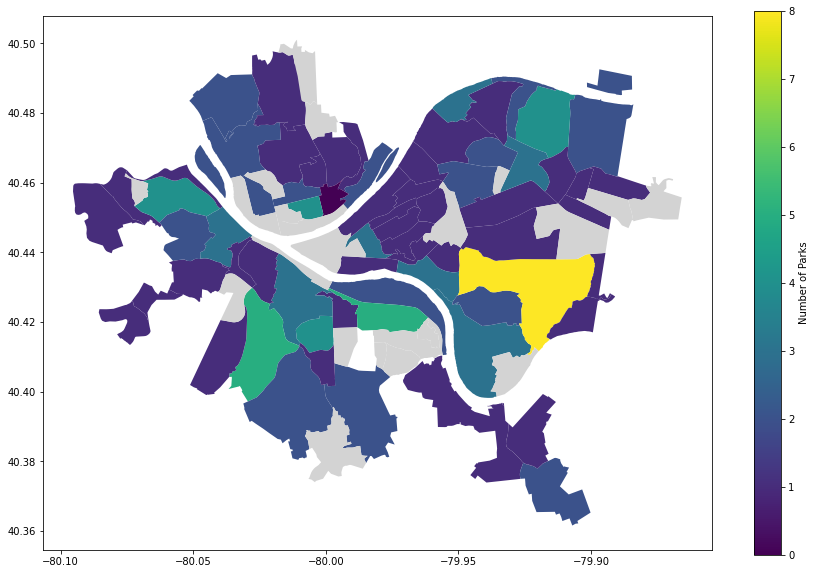

In [7]:
pg_map.plot(column='park',
           legend = True,
           legend_kwds={'label': "Number of Parks"},
           figsize=(15,10),
           missing_kwds={'color': "lightgrey"}
           )

 The above heatmap provides an appealing representation of the total number of parks in each Pittsburgh neighborhood, with Squirrel Hill South distinctly marked in yellow, and the surrounding neighborhoods shown in darker shades of green and blue...

Additionally, neighborhoods with no playgrounds are grayed out

# The "Top Three"

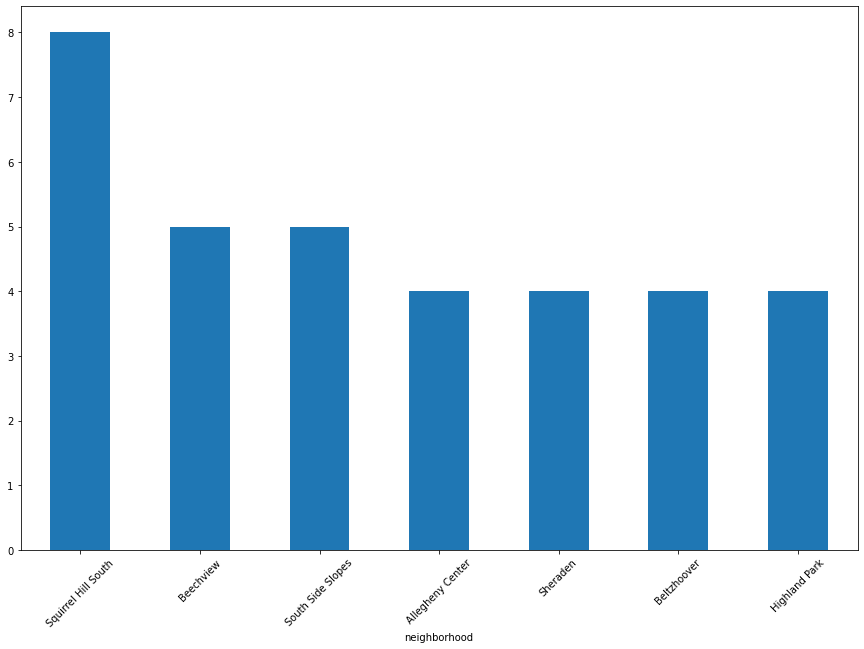

In [9]:
pg_count_7 = pg_count.head(7)
pg_count_7.plot(kind='bar', figsize=(15,10), rot=45)

# In Conclusion...

 - By a wide a margin, Squirrel Hill South is the "best" neighborhood in Pittsburgh, with a total of 8 plagrounds. 
 - The neighborhoods of Beechview andSouthside Slopes came in second with 5 playgrounds each
 - Sheraden, Beltzhoover, and Highland Park  rounded out third place, having 4 parks per neighborhood.
 

# Additional Notes
- Since the dataset is first and foremost a total list of the playgrounds in the City of Pittsburgh, there were quite a number of neighborhoods that were not included in the dataset at all, as they had no designated playgrounds at all
- The dataset has not been updated since 2021, so it should be noted additional playgrounds may have been built in the meantime